<a href="https://colab.research.google.com/github/sidhanth123/ML_Lab/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.2],
    [2.2,2.9,1.4],
    [3.1,3.0,1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.5,1.6,0.8],
    [1.1,0.9,0.2],
    [1.9,2.2,1.1],
    [2.8,0.4,1.3]
])

In [5]:
df = pd.DataFrame(data,columns=['A','B','C'])

In [6]:
df

,A,B,C
0,2.5,2.4,1.2
1,0.5,0.7,0.2
2,2.2,2.9,1.4
3,3.1,3.0,1.7
4,2.3,2.7,1.5
5,2.0,1.6,0.9
6,1.5,1.6,0.8
7,1.1,0.9,0.2
8,1.9,2.2,1.1
9,2.8,0.4,1.3


In [7]:
standardized_data = (df - df.mean()) / df.std()

In [8]:
cov_matrix = np.cov(standardized_data.T)

In [9]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [11]:
sorted_indices = np.argsort(eig_vals)[::1]
eig_vals = eig_vals[sorted_indices]
eig_vals = eig_vecs[:,sorted_indices]

In [12]:
eig_vecs_subset = eig_vecs[:,:2]

In [14]:
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data,columns=['PC1','PC2'])

In [15]:
print("\nReduced Data (after PCA):\n", reduced_df)


Reduced Data (after PCA):
         PC1       PC2
0 -0.893909 -0.280408
1  2.746410  0.200422
2 -1.189127  0.122849
3 -2.279478 -0.150176
4 -1.275870  0.244217
5  0.282861 -0.140793
6  0.776772  0.095999
7  2.190501 -0.311846
8 -0.215942  0.083383
9 -0.142218  0.136354


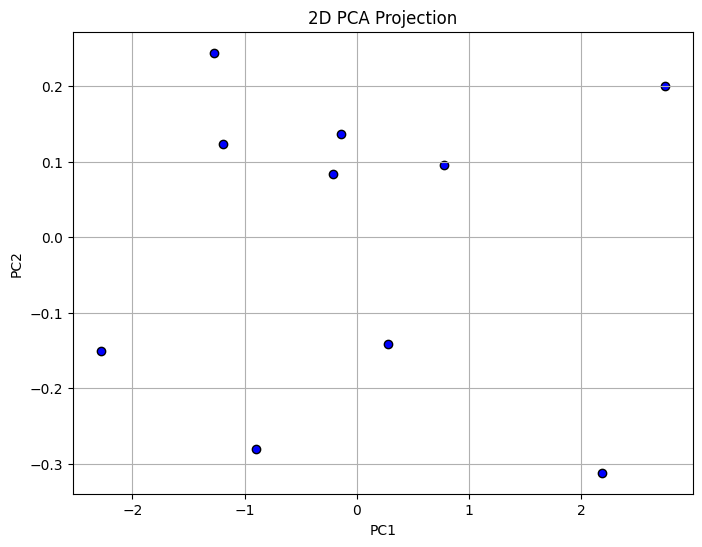

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()